In [3]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns

# Load the dataset

In [5]:
df = pd.read_csv('Uber Request Data.csv',delimiter='\t')

# Understand the data

In [7]:
df.shape

(6745, 6)

In [8]:
df.head()

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp
0,619,Airport,1.0,Trip Completed,11/7/2016 11:51,11/7/2016 13:00
1,867,Airport,1.0,Trip Completed,11/7/2016 17:57,11/7/2016 18:47
2,1807,City,1.0,Trip Completed,12/7/2016 9:17,12/7/2016 9:58
3,2532,Airport,1.0,Trip Completed,12/7/2016 21:08,12/7/2016 22:03
4,3112,City,1.0,Trip Completed,13-07-2016 08:33:16,13-07-2016 09:25:47


In [9]:
df.columns

Index(['Request id', 'Pickup point', 'Driver id', 'Status',
       'Request timestamp', 'Drop timestamp'],
      dtype='object')

In [10]:
df.drop('Request id',axis=1,inplace=True)

In [11]:
df.describe()

,Driver id
count,4095.000000
mean,149.501343
std,86.051994
min,1.000000
25%,75.000000
50%,149.000000
75%,224.000000
max,300.000000


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6745 entries, 0 to 6744
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Pickup point       6745 non-null   object 
 1   Driver id          4095 non-null   float64
 2   Status             6745 non-null   object 
 3   Request timestamp  6745 non-null   object 
 4   Drop timestamp     2831 non-null   object 
dtypes: float64(1), object(4)
memory usage: 263.6+ KB


# Data Preprocessing

In [14]:
# checking nulls
df.isna().sum()

Pickup point            0
Driver id            2650
Status                  0
Request timestamp       0
Drop timestamp       3914
dtype: int64

In [15]:
df['Status'].value_counts()

Status
Trip Completed       2831
No Cars Available    2650
Cancelled            1264
Name: count, dtype: int64

# sum of cancelled and no cars equals number of nulls in drop timestamp

In [27]:
df['Drop timestamp'].fillna('Unassigned', inplace=True)

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_26768\4007546374.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Drop timestamp'].fillna('Unassigned', inplace=True)


In [29]:
# Drop rows where 'Driver id' is null
df_cleaned = df.dropna(subset=['Driver id'])

# Optional: Reset index after dropping
df_cleaned.reset_index(drop=True, inplace=True)

In [31]:
df.isna().sum()

Pickup point            0
Driver id            2650
Status                  0
Request timestamp       0
Drop timestamp          0
dtype: int64

In [33]:
# dropping rows that has null in driver id

df = df.dropna(subset=['Driver id'])

df.reset_index(drop=True, inplace=True)

In [35]:
df.isna().sum()

Pickup point         0
Driver id            0
Status               0
Request timestamp    0
Drop timestamp       0
dtype: int64

# Feauture Engineering

In [38]:
pickup_values = df['Pickup point'].value_counts().reset_index()
print(pickup_values)

  Pickup point  count
0         City   2570
1      Airport   1525


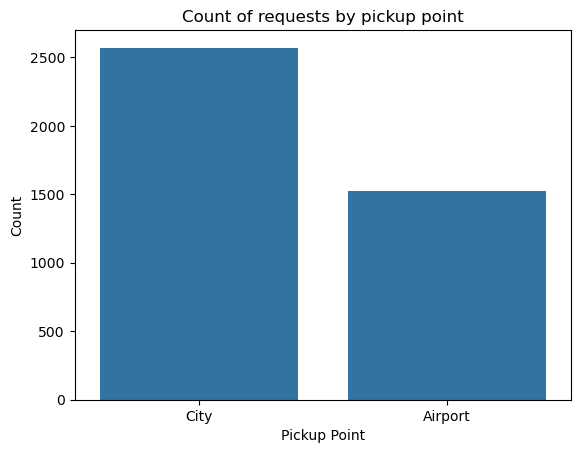

In [40]:
# visualizing number of requests by location

sns.barplot(pickup_values,x='Pickup point',y='count')
plt.title('Count of requests by pickup point')
plt.xlabel("Pickup Point")
plt.ylabel("Count")
plt.show()

In [41]:
status_values = df['Status'].value_counts().reset_index()
print(status_values)

           Status  count
0  Trip Completed   2831
1       Cancelled   1264


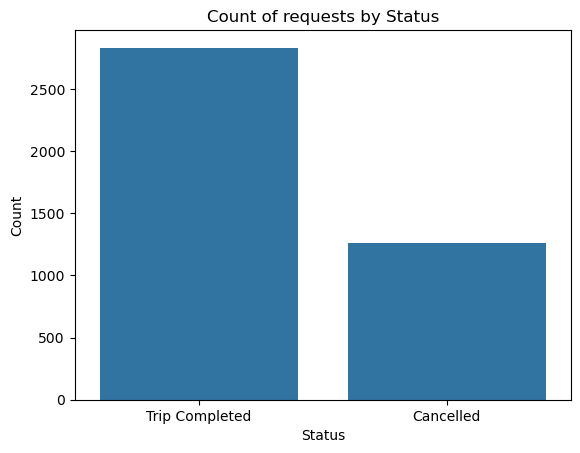

In [44]:
# visualizing number of requests by status
# no cars available dropped with the nulls in driver id

sns.barplot(status_values,x='Status',y='count')
plt.title('Count of requests by Status')
plt.xlabel("Status")
plt.ylabel("Count")
plt.show()

In [45]:
# define a custom parser function for Request timestamp

def parse_date(date_str):
    for fmt in ('%Y-%d-%m %H:%M', '%Y-%d-%m %H:%M:%S', '%d/%m/%Y %H:%M', '%d-%m-%Y %H:%M:%S'):
        try:
            return pd.to_datetime(date_str, format=fmt)
        except ValueError:
            continue
    return pd.NaT  # Return NaT if no format matched

In [48]:
df['Request timestamp'] = df['Request timestamp'].apply(parse_date)

In [49]:
# adding hour of day column

df['Hour of Day'] = df['Request timestamp'].dt.hour

In [50]:
# adding day of week column

df['Day of Week'] = df['Request timestamp'].dt.dayofweek

In [51]:
# adding day name column

df['Day Name'] = df['Request timestamp'].dt.day_name()

In [52]:
df.head()

,Pickup point,Driver id,Status,Request timestamp,Drop timestamp,Hour of Day,Day of Week,Day Name
0,Airport,1.0,Trip Completed,2016-07-11 11:51:00,11/7/2016 13:00,11,0,Monday
1,Airport,1.0,Trip Completed,2016-07-11 17:57:00,11/7/2016 18:47,17,0,Monday
2,City,1.0,Trip Completed,2016-07-12 09:17:00,12/7/2016 9:58,9,1,Tuesday
3,Airport,1.0,Trip Completed,2016-07-12 21:08:00,12/7/2016 22:03,21,1,Tuesday
4,City,1.0,Trip Completed,2016-07-13 08:33:16,13-07-2016 09:25:47,8,2,Wednesday


In [53]:
# define function to get week of month

def get_week_of_month(day):
    if day <= 7:
        return 'Week 1'
    elif day <= 14:
        return 'Week 2'
    elif day <= 21:
        return 'Week 3'
    else:
        return 'Week 4+'

In [54]:
# apply the function

df['Week_of_Month'] = df['Request timestamp'].dt.day.apply(get_week_of_month)

In [55]:
df.head()

,Pickup point,Driver id,Status,Request timestamp,Drop timestamp,Hour of Day,Day of Week,Day Name,Week_of_Month
0,Airport,1.0,Trip Completed,2016-07-11 11:51:00,11/7/2016 13:00,11,0,Monday,Week 2
1,Airport,1.0,Trip Completed,2016-07-11 17:57:00,11/7/2016 18:47,17,0,Monday,Week 2
2,City,1.0,Trip Completed,2016-07-12 09:17:00,12/7/2016 9:58,9,1,Tuesday,Week 2
3,Airport,1.0,Trip Completed,2016-07-12 21:08:00,12/7/2016 22:03,21,1,Tuesday,Week 2
4,City,1.0,Trip Completed,2016-07-13 08:33:16,13-07-2016 09:25:47,8,2,Wednesday,Week 2


In [56]:
# define function to categorize hour into time of day
def get_time_of_day(hour):
    if 5 <= hour < 12:
        return 'Morning'
    elif 12 <= hour < 17:
        return 'Afternoon'
    elif 17 <= hour < 21:
        return 'Evening'
    else:
        return 'Night'

In [61]:
df['Time of Day'] = df['Hour of Day'].apply(get_time_of_day)

In [68]:
df.head()

,Pickup point,Driver id,Status,Request timestamp,Drop timestamp,Hour of Day,Day of Week,Day Name,Week_of_Month,Time of Day
0,Airport,1.0,Trip Completed,2016-07-11 11:51:00,11/7/2016 13:00,11,0,Monday,Week 2,Morning
1,Airport,1.0,Trip Completed,2016-07-11 17:57:00,11/7/2016 18:47,17,0,Monday,Week 2,Evening
2,City,1.0,Trip Completed,2016-07-12 09:17:00,12/7/2016 9:58,9,1,Tuesday,Week 2,Morning
3,Airport,1.0,Trip Completed,2016-07-12 21:08:00,12/7/2016 22:03,21,1,Tuesday,Week 2,Night
4,City,1.0,Trip Completed,2016-07-13 08:33:16,13-07-2016 09:25:47,8,2,Wednesday,Week 2,Morning


In [70]:
df.drop('Hour of Day',axis=1,inplace=True)

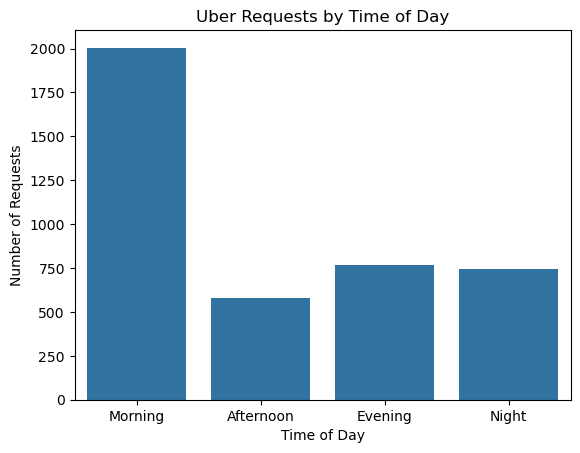

In [72]:
# visualizing requests by time of day

sns.countplot(data=df, x='Time of Day', order=['Morning', 'Afternoon', 'Evening', 'Night'])
plt.title("Uber Requests by Time of Day")
plt.xlabel("Time of Day")
plt.ylabel("Number of Requests")
plt.show()

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_26768\2134012924.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Week_of_Month', order=['Week 1', 'Week 2', 'Week 3', 'Week 4', 'Week 5'], palette="viridis")


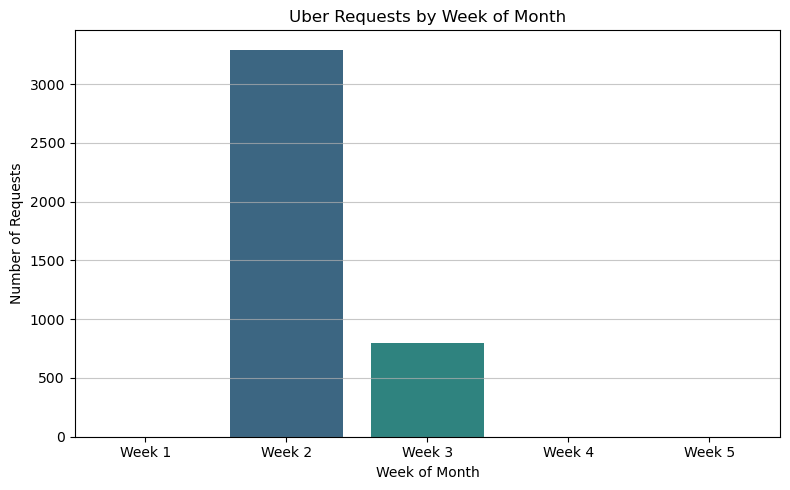

In [74]:
# visualizing requests by week of month

plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='Week_of_Month', order=['Week 1', 'Week 2', 'Week 3', 'Week 4', 'Week 5'], palette="viridis")
plt.title("Uber Requests by Week of Month")
plt.xlabel("Week of Month")
plt.ylabel("Number of Requests")
plt.xticks(rotation=0)
plt.grid(axis='y', alpha=0.7)
plt.tight_layout()
plt.show()

In [76]:
df['Week_of_Month'].value_counts()

Week_of_Month
Week 2    3294
Week 3     801
Name: count, dtype: int64

In [78]:
df['Request timestamp'].dt.day_name().value_counts()

Request timestamp
Monday       863
Wednesday    847
Tuesday      802
Friday       801
Thursday     782
Name: count, dtype: int64

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_26768\1034254070.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Day Name', order=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'], palette="viridis")


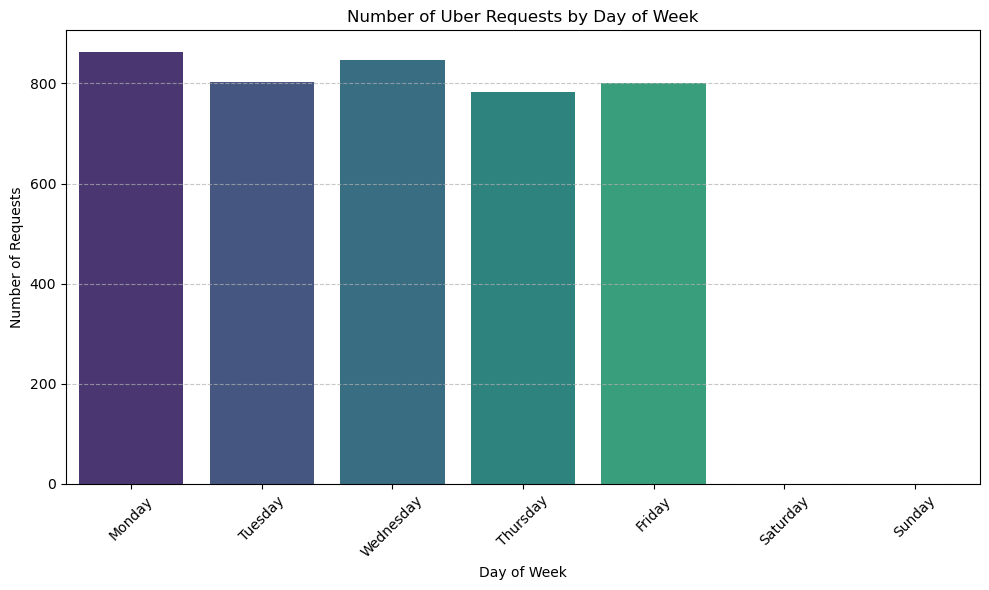

In [84]:
# visualizing requests by day of week

plt.figure(figsize=(10,6))
sns.countplot(data=df, x='Day Name', order=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'], palette="viridis")
plt.title("Number of Uber Requests by Day of Week")
plt.xlabel("Day of Week")
plt.ylabel("Number of Requests")
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [82]:
pivot_table = df.pivot_table(index='Day Name', columns='Time of Day', aggfunc='size', fill_value=0)
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
pivot_table = pivot_table.reindex(day_order)

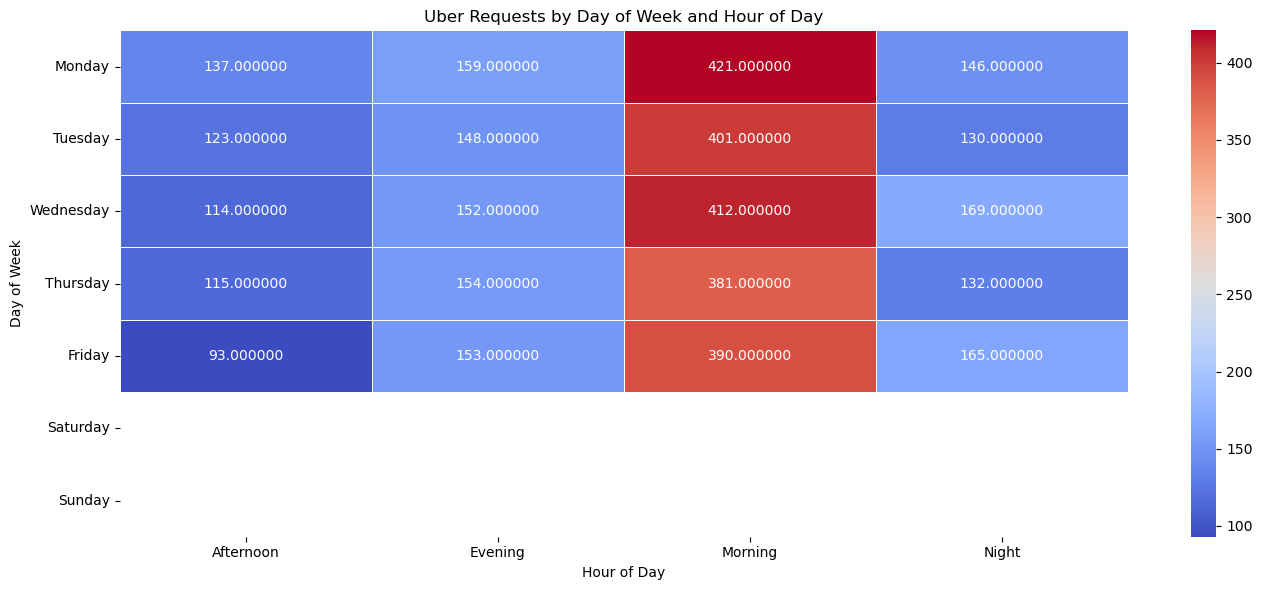

In [522]:
plt.figure(figsize=(14, 6))
sns.heatmap(pivot_table, annot=True, fmt="f", cmap="coolwarm", linewidths=.5)
plt.title("Uber Requests by Day of Week and Hour of Day")
plt.ylabel("Day of Week")
plt.xlabel("Hour of Day")
plt.tight_layout()
plt.show()

In [524]:
df['is_cancelled'] = df['Status'].apply(lambda x: x in ['Cancelled', 'No Cars Available'])

In [526]:
# calculate the cancellation rate

total_requests = len(df)
cancelled_requests = df['is_cancelled'].sum()
cancellation_rate = cancelled_requests / total_requests

print(f"Cancelled Requests: {cancelled_requests}")
print(f"Cancellation Rate: {cancellation_rate:.2%}")

Cancelled Requests: 1264
Cancellation Rate: 30.87%


In [528]:
grouped = df.groupby(['Pickup point', 'Time of Day'])[['is_cancelled']].agg(['sum', 'count'])
grouped['cancellation_rate'] = grouped[('is_cancelled', 'sum')] / grouped[('is_cancelled', 'count')]

print(grouped['cancellation_rate'].unstack(level='Time of Day'))

Time of Day   Afternoon  Evening   Morning     Night
Pickup point                                        
Airport        0.181818  0.20000  0.071017  0.097345
City           0.133550  0.12234  0.595013  0.238213


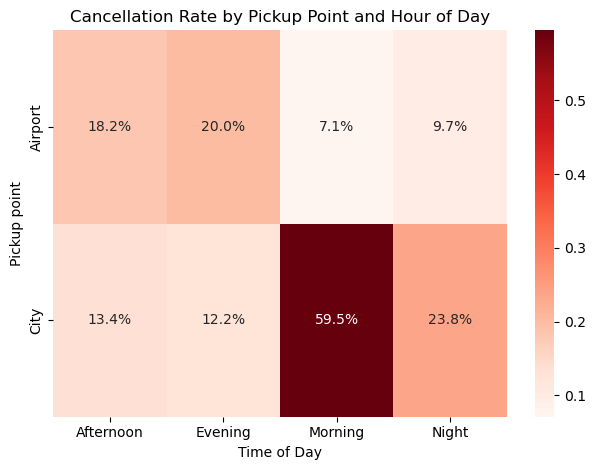

In [530]:
# visualizing cancellation rate by location and Time

pivot_table = df.pivot_table(
    index='Pickup point',
    columns='Time of Day',
    values='is_cancelled',
    aggfunc='mean'
)

sns.heatmap(pivot_table, annot=True, fmt=".1%", cmap="Reds")
plt.title("Cancellation Rate by Pickup Point and Hour of Day")
plt.tight_layout()
plt.show()

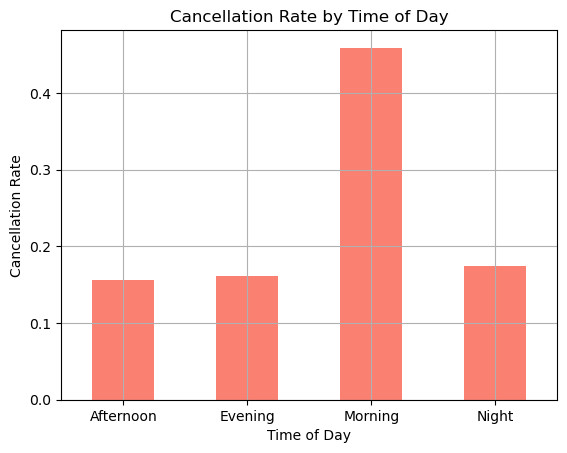

In [532]:
# visualizing cancellation rate by time

grouped = df.groupby('Time of Day')[['is_cancelled']].agg(['sum', 'count'])
grouped['cancellation_rate'] = grouped[('is_cancelled', 'sum')] / grouped[('is_cancelled', 'count')]

grouped['cancellation_rate'].plot(kind='bar', color='salmon')
plt.title("Cancellation Rate by Time of Day")
plt.ylabel("Cancellation Rate")
plt.xlabel("Time of Day")
plt.xticks(rotation=0)
plt.grid(True)
plt.show()

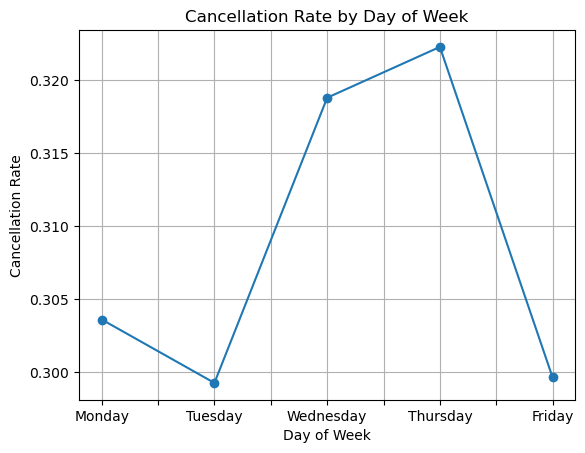

In [534]:
# visualizing cancellation rate by day of week

grouped = df.groupby('Day Name')[['is_cancelled']].agg(['sum', 'count'])
grouped['cancellation_rate'] = grouped[('is_cancelled', 'sum')] / grouped[('is_cancelled', 'count')]

grouped = grouped.reindex(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])

grouped['cancellation_rate'].plot(kind='line', marker='o')
plt.title("Cancellation Rate by Day of Week")
plt.ylabel("Cancellation Rate")
plt.xlabel("Day of Week")
plt.grid(True)
plt.show()

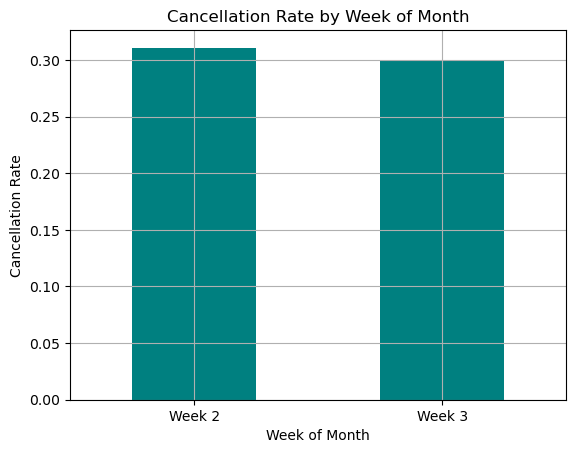

In [536]:
# visualizing cancellation rate by month

grouped = df.groupby('Week_of_Month')[['is_cancelled']].agg(['sum', 'count'])
grouped['cancellation_rate'] = grouped[('is_cancelled', 'sum')] / grouped[('is_cancelled', 'count')]

grouped['cancellation_rate'].plot(kind='bar', color='teal')
plt.title("Cancellation Rate by Week of Month")
plt.ylabel("Cancellation Rate")
plt.xlabel("Week of Month")
plt.xticks(rotation=0)
plt.grid(True)
plt.show()

In [538]:
df.head()

,Pickup point,Driver id,Status,Request timestamp,Drop timestamp,Day of Week,Day Name,Week_of_Month,Time of Day,is_cancelled
0,Airport,1.0,Trip Completed,2016-07-11 11:51:00,11/7/2016 13:00,0,Monday,Week 2,Morning,False
1,Airport,1.0,Trip Completed,2016-07-11 17:57:00,11/7/2016 18:47,0,Monday,Week 2,Evening,False
2,City,1.0,Trip Completed,2016-07-12 09:17:00,12/7/2016 9:58,1,Tuesday,Week 2,Morning,False
3,Airport,1.0,Trip Completed,2016-07-12 21:08:00,12/7/2016 22:03,1,Tuesday,Week 2,Night,False
4,City,1.0,Trip Completed,2016-07-13 08:33:16,13-07-2016 09:25:47,2,Wednesday,Week 2,Morning,False


In [540]:
# group by Driver ID and calculate cancellation rate

driver_cancellation = df.groupby('Driver id')['is_cancelled'].agg(['sum', 'count'])
driver_cancellation['cancellation_rate'] = driver_cancellation['sum'] / driver_cancellation['count']

# show top 10 drivers by cancellation rate
print(driver_cancellation.sort_values(by='cancellation_rate', ascending=False).head(10))

           sum  count  cancellation_rate
Driver id                               
267.0        9     15           0.600000
206.0       10     17           0.588235
103.0        7     12           0.583333
104.0        7     12           0.583333
54.0        11     19           0.578947
84.0        12     21           0.571429
131.0        8     14           0.571429
135.0        6     11           0.545455
62.0         7     13           0.538462
229.0        7     13           0.538462


In [542]:
# total requests per driver
request_count = df['Driver id'].value_counts().reset_index()
request_count.columns = ['Driver id', 'Total Requests']

# cancellation rate per driver
cancellation_rate = df.groupby('Driver id')['is_cancelled'].agg(['sum', 'count'])
cancellation_rate['cancellation_rate'] = cancellation_rate['sum'] / cancellation_rate['count']
cancellation_rate.reset_index(inplace=True)

# merge both
driver_analysis = pd.merge(request_count, cancellation_rate[['Driver id', 'cancellation_rate']], on='Driver id')

# sort by total requests
driver_analysis.sort_values(by='Total Requests', ascending=False, inplace=True)

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_37600\1508379835.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_drivers, x='Driver id', y='Total Requests', palette="viridis")


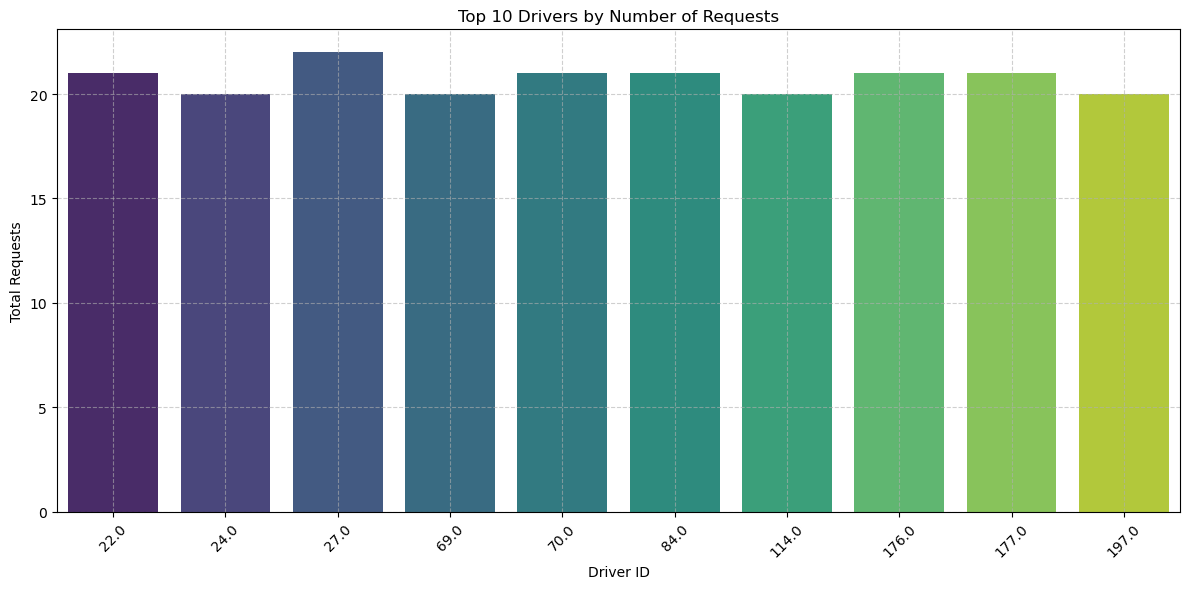

In [544]:
# visualizing top 10 drivers by number of requests
top_n = 10
top_drivers = driver_analysis.head(top_n)

plt.figure(figsize=(12, 6))
sns.barplot(data=top_drivers, x='Driver id', y='Total Requests', palette="viridis")
plt.title(f"Top {top_n} Drivers by Number of Requests")
plt.xlabel("Driver ID")
plt.ylabel("Total Requests")
plt.xticks(rotation=45)
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

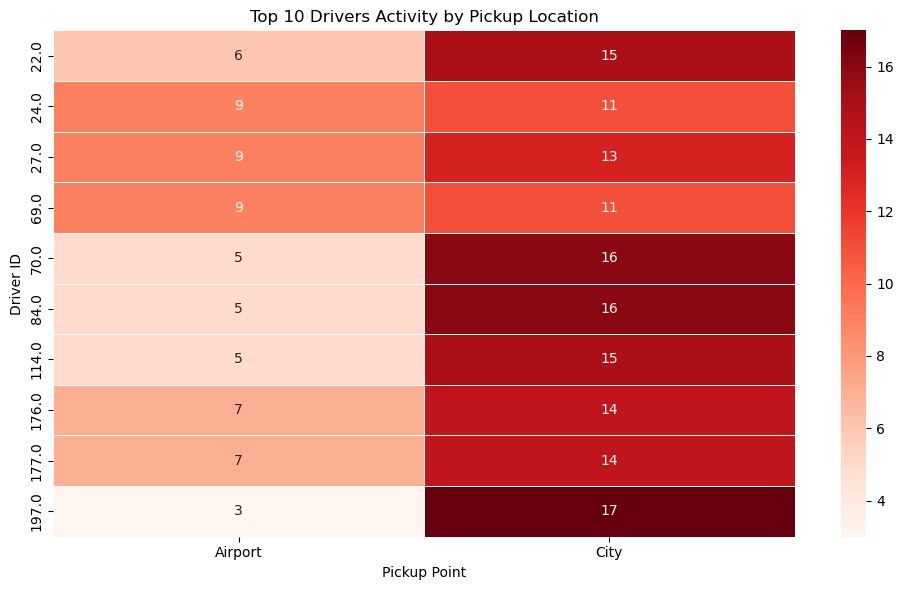

In [555]:
 # calculate total requests per driver
top_drivers = df['Driver id'].value_counts(dropna=False).nlargest(10).index.tolist()

# filtering top 10 drivers
df_top10 = df[df['Driver id'].isin(top_drivers)]

# create pivot table for heatmap
pickup_by_driver = df_top10.pivot_table(
    index='Driver id',
    columns='Pickup point',
    aggfunc='size',
    fill_value=0
)

# visualizing by heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(pickup_by_driver, annot=True, fmt="d", cmap="Reds", linewidths=.5)
plt.title("Top 10 Drivers Activity by Pickup Location")
plt.ylabel("Driver ID")
plt.xlabel("Pickup Point")
plt.tight_layout()
plt.show()

# K-Means clustering

In [558]:
# prepare the data

pickup_driver = df.pivot_table(
    index='Driver id',
    columns='Pickup point',
    aggfunc='size',
    fill_value=0
).reset_index()

In [560]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

X = pickup_driver[['Airport', 'City']].values
scaler = StandardScaler()
x_scaled = scaler.fit_transform(X)

kmeans = KMeans(n_clusters=5, random_state=42)
y_kmeans = kmeans.fit_predict(x_scaled)

C:\Users\Lenovo\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


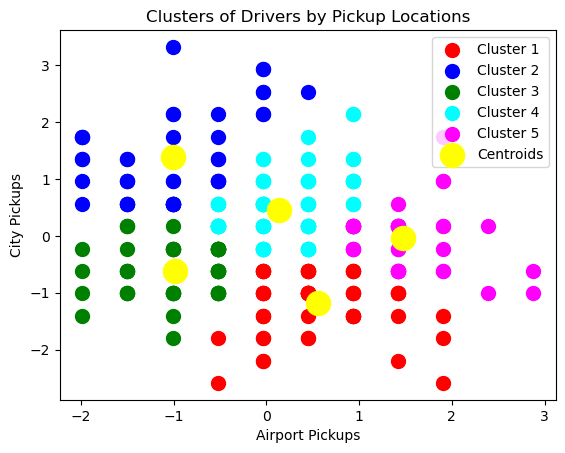

In [562]:
# visualizing the clusters 

plt.scatter(x_scaled[y_kmeans == 0, 0], x_scaled[y_kmeans == 0, 1], s=100, c='red', label='Cluster 1')
plt.scatter(x_scaled[y_kmeans == 1, 0], x_scaled[y_kmeans == 1, 1], s=100, c='blue', label='Cluster 2')
plt.scatter(x_scaled[y_kmeans == 2, 0], x_scaled[y_kmeans == 2, 1], s=100, c='green', label='Cluster 3')
plt.scatter(x_scaled[y_kmeans == 3, 0], x_scaled[y_kmeans == 3, 1], s=100, c='cyan', label='Cluster 4')
plt.scatter(x_scaled[y_kmeans == 4, 0], x_scaled[y_kmeans == 4, 1], s=100, c='magenta', label='Cluster 5')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='yellow', label='Centroids')

plt.title('Clusters of Drivers by Pickup Locations')
plt.xlabel('Airport Pickups')
plt.ylabel('City Pickups')
plt.legend()
plt.show()